<a href="https://colab.research.google.com/github/Lopesg-Marcia/ml-reg/blob/main/Google_Ads_ML_Reg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Load Libraries

In [1]:
import pandas as pd
import seaborn as srn
import statistics  as sts
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# Upload data

In [2]:
url = 'https://docs.google.com/spreadsheets/d/1jd3c7CpUC0pgSxLVYXSFncqVEea3hLOivc3MlNq-axo/gviz/tq?tqx=out:csv'

In [3]:
dataset = pd.read_csv(url)

In [4]:
dataset.head()

,Campaign Name,Clicks,Impressions,CPC,CTR,Conversions,CVR
0,Campaign 465,348.0,4045,$1.50,8.60%,11,3.16%
1,Campaign 57,908.0,17668,$1.48,5.14%,53,5.84%
2,Campaign 59,331.0,6464,$1.45,5.12%,18,5.44%
3,Campaign 464,909.0,17677,$1.45,5.14%,29,3.19%
4,Campaign 8,542.0,5424,$1.44,9.99%,32,5.90%


# Initial Data Exploration

## Dataset

In [5]:
# Size
dataset.shape


(500, 7)

In [6]:
# Type
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Campaign Name  500 non-null    object 
 1   Clicks         499 non-null    float64
 2   Impressions    500 non-null    int64  
 3   CPC            499 non-null    object 
 4   CTR            499 non-null    object 
 5   Conversions    500 non-null    int64  
 6   CVR            499 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 27.5+ KB
None


In [7]:
# Visualize
dataset.head()

,Campaign Name,Clicks,Impressions,CPC,CTR,Conversions,CVR
0,Campaign 465,348.0,4045,$1.50,8.60%,11,3.16%
1,Campaign 57,908.0,17668,$1.48,5.14%,53,5.84%
2,Campaign 59,331.0,6464,$1.45,5.12%,18,5.44%
3,Campaign 464,909.0,17677,$1.45,5.14%,29,3.19%
4,Campaign 8,542.0,5424,$1.44,9.99%,32,5.90%


## Attributes

In [8]:
# Removing unused attibutes
dataset = dataset.drop(['Campaign Name', 'CVR', 'CTR'], axis=1)

In [9]:
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Clicks       499 non-null    float64
 1   Impressions  500 non-null    int64  
 2   CPC          499 non-null    object 
 3   Conversions  500 non-null    int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 15.8+ KB
None


In [10]:
dataset['Clicks'].describe()

,Clicks
count,499.000000
mean,589.042084
std,233.816528
min,202.000000
25%,376.500000
50%,583.000000
75%,780.000000
max,1000.000000


In [11]:
dataset['Impressions'].describe()

,Impressions
count,500.000000
mean,7089.748000
std,3700.703581
min,2004.000000
25%,4254.750000
50%,6358.000000
75%,8835.000000
max,19414.000000


In [12]:
dataset['CPC'].describe()

,CPC
count,499
unique,85
top,$0.69
freq,17


# Data Transformation

## Treat Incorrect Data Types

In [13]:
# Type
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Clicks       499 non-null    float64
 1   Impressions  500 non-null    int64  
 2   CPC          499 non-null    object 
 3   Conversions  500 non-null    int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 15.8+ KB
None


### CPC

In [14]:
# Converting Object to Numeric
temp_cpc = pd.to_numeric(dataset['CPC'], errors='coerce')
print(temp_cpc.head())

0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
Name: CPC, dtype: float64


In [15]:
# Replacing commas with periods
temp_cpc = dataset['CPC'].str.replace(',', '.', regex=True)
print(temp_cpc.head())

0    $1.50
1    $1.48
2    $1.45
3    $1.45
4    $1.44
Name: CPC, dtype: object


In [16]:
# Removing non-numeric characters such as symbols or spaces
temp_cpc = dataset['CPC'].str.replace('[^\d.]', '', regex=True)
print(temp_cpc.head())

0    1.50
1    1.48
2    1.45
3    1.45
4    1.44
Name: CPC, dtype: object


In [17]:
# Converting Object to Numeric
temp_cpc = pd.to_numeric(temp_cpc, errors='coerce')
print(temp_cpc.head())

0    1.50
1    1.48
2    1.45
3    1.45
4    1.44
Name: CPC, dtype: float64


In [18]:
dataset['CPC'] = temp_cpc
print(dataset['CPC'].head())

0    1.50
1    1.48
2    1.45
3    1.45
4    1.44
Name: CPC, dtype: float64


In [19]:
# Type
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Clicks       499 non-null    float64
 1   Impressions  500 non-null    int64  
 2   CPC          499 non-null    float64
 3   Conversions  500 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 15.8 KB
None


# Data Exploration and Analysis

## Clicks

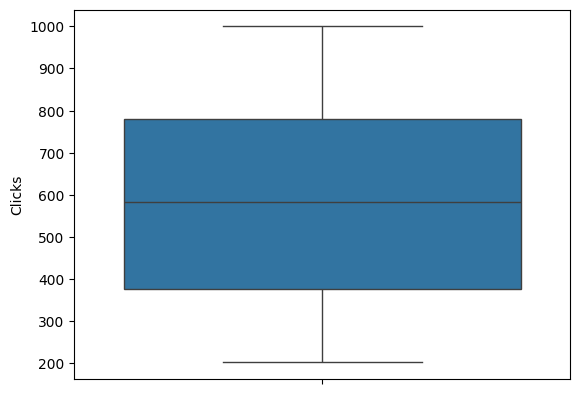

In [20]:
srn.boxplot(dataset['Clicks'])
plt.show()

<Axes: xlabel='Clicks', ylabel='Count'>

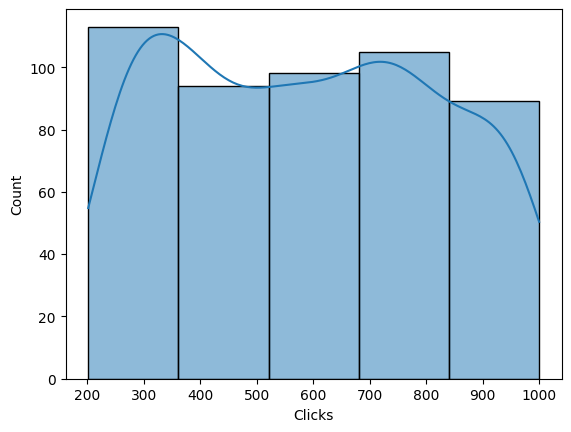

In [21]:
srn.histplot(dataset['Clicks'],bins=5,kde=True)

## Impressions

<Axes: ylabel='Impressions'>

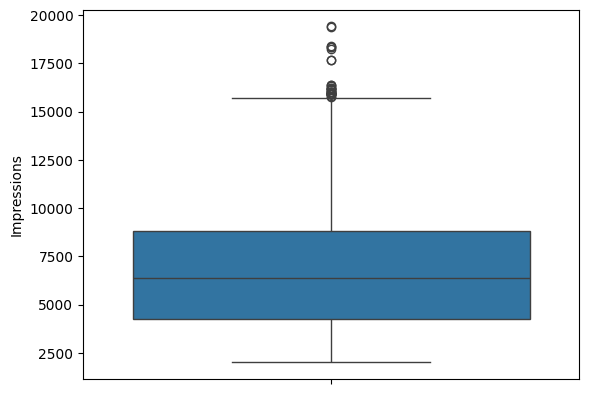

In [22]:
srn.boxplot(dataset['Impressions'])

<Axes: xlabel='Impressions', ylabel='Count'>

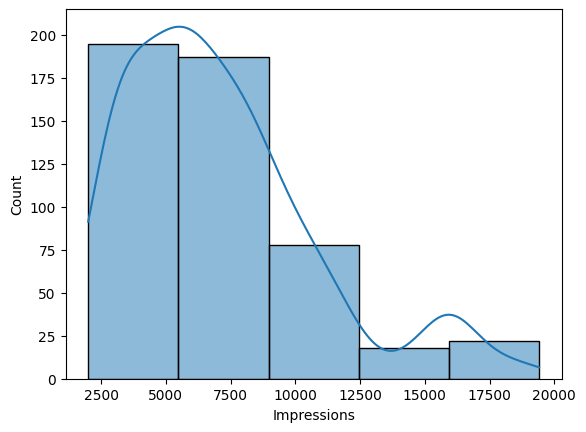

In [23]:
srn.histplot(dataset['Impressions'],bins=5,kde=True)

## CPC

<Axes: ylabel='CPC'>

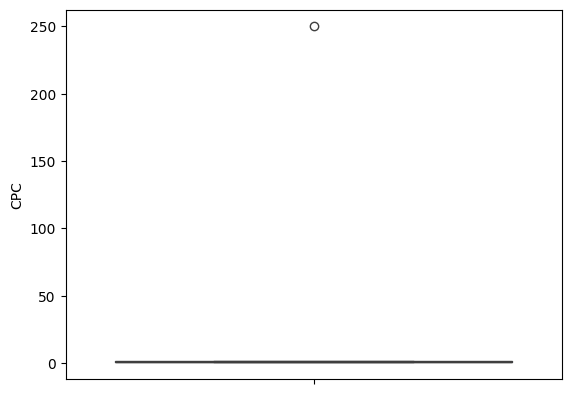

In [24]:
srn.boxplot(dataset['CPC'])

<Axes: xlabel='CPC', ylabel='Count'>

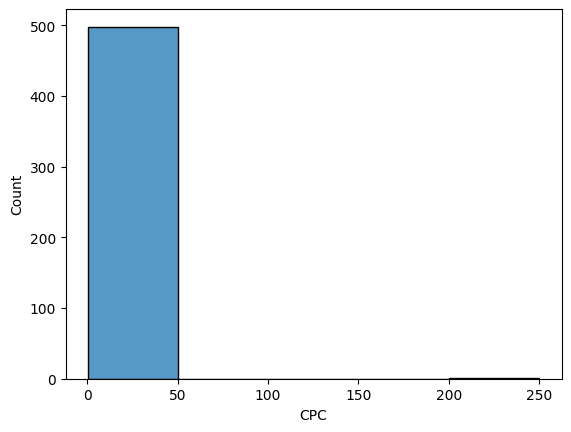

In [25]:
srn.histplot(dataset['CPC'],bins=5)

In [26]:
dataset['CPC'].describe()

,CPC
count,499.000000
mean,1.359960
std,11.155968
min,0.440000
25%,0.640000
50%,0.820000
75%,1.100000
max,250.000000


In [27]:
# Creating a temporary series to show Boxplot without Outliers
temp_cpc2 = dataset['CPC']
print(temp_cpc2.head())

0    1.50
1    1.48
2    1.45
3    1.45
4    1.44
Name: CPC, dtype: float64


In [28]:
Q1 = temp_cpc2.quantile(0.25)
Q3 = temp_cpc2.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
filtered_data = temp_cpc2[(temp_cpc2 >= lower_bound) & (temp_cpc2 <= upper_bound)]

<Axes: ylabel='CPC'>

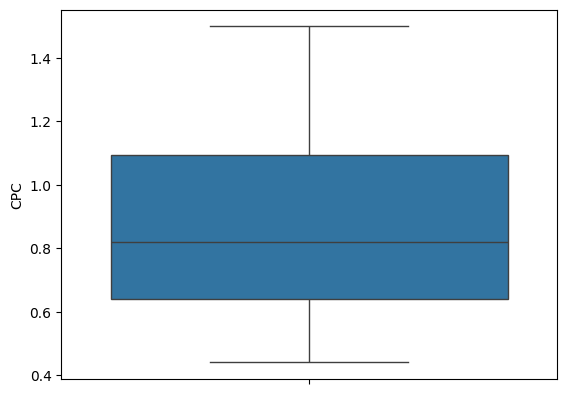

In [29]:
# Boxplot without Outliers
srn.boxplot(filtered_data)

<Axes: xlabel='CPC', ylabel='Count'>

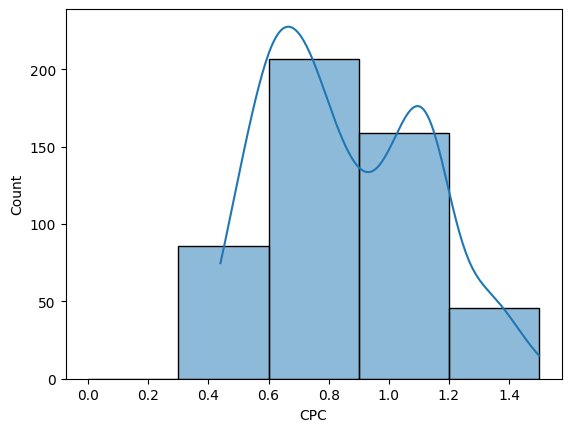

In [30]:
# Histogram without Outliers
bins = [0, 0.3, 0.6, 0.9, 1.2, 1.5]
srn.histplot(filtered_data,bins=bins,kde=True)

## Conversions

<Axes: ylabel='Conversions'>

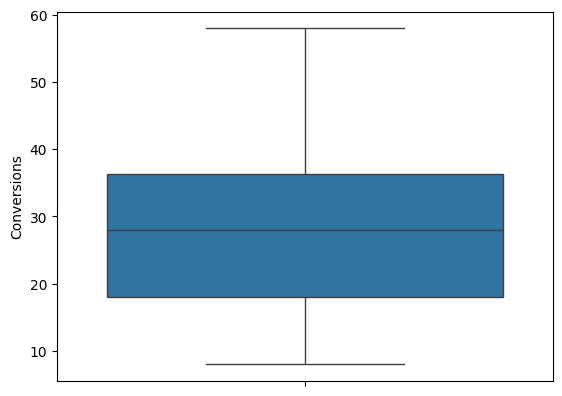

In [31]:
srn.boxplot(dataset['Conversions'])

<Axes: xlabel='Conversions', ylabel='Count'>

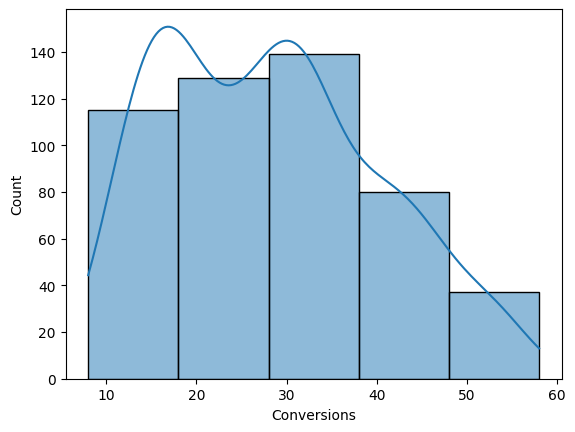

In [32]:
srn.histplot(dataset['Conversions'],bins=5,kde=True)

# Data Cleaning

## Treat Missing Values

In [33]:
# Check NAN
dataset.isnull().sum()

,0
Clicks,1
Impressions,0
CPC,1
Conversions,0


### Clicks

In [34]:
# Replacing Null with the median as the distribution is asymmetric and has outliers
mediana_clicks = dataset['Clicks'].median()
dataset['Clicks'].fillna(mediana_clicks, inplace=True)

### CPC

In [35]:
# Replacing Null with the median as the distribution is asymmetric and has outliers
mediana_cpc = dataset['CPC'].median()
dataset['CPC'].fillna(mediana_cpc, inplace=True)

## Treat Duplicate Values

In [36]:
dup = dataset.duplicated()
print(dup)

0      False
1      False
2      False
3      False
4      False
       ...  
495    False
496    False
497    False
498    False
499    False
Length: 500, dtype: bool


In [37]:
num_dup = dataset.duplicated().sum()
print(num_dup)

1


## Treat Outliers

### Clicks

In [38]:
Q1 = dataset['Clicks'].quantile(0.25)
Q3 = dataset['Clicks'].quantile(0.75)
IQR = Q3 - Q1
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR
out_clicks = dataset[(dataset['Clicks'] < limite_inferior) | (dataset['Clicks'] > limite_superior)]
print(out_clicks)

Empty DataFrame
Columns: [Clicks, Impressions, CPC, Conversions]
Index: []


### Impressions

In [39]:
Q1 = dataset['Impressions'].quantile(0.25)
Q3 = dataset['Impressions'].quantile(0.75)
IQR = Q3 - Q1
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR
out_imp = dataset[(dataset['Impressions'] < limite_inferior) | (dataset['Impressions'] > limite_superior)]
print(out_imp)

     Clicks  Impressions   CPC  Conversions
1     908.0        17668  1.48           53
3     909.0        17677  1.45           29
13    974.0        18328  1.37           40
25    974.0        16172  1.32           29
31    928.0        15901  1.31           28
32    895.0        16135  1.31           27
76    997.0        19414  1.14           47
134   984.0        18411  1.06           42
136   988.0        19380  1.06           58
150   980.0        16228  1.04           52
159   988.0        16374  1.03           43
166   957.0        18328  1.02           54
204   920.0        15901  0.91           28
248   868.0        15883  0.83           39
266   978.0        16209  0.78           55
285   995.0        18230  0.76           45
290   914.0        15883  0.75           52
316   929.0        15750  0.72           35
353   962.0        15901  0.68           45
371   955.0        15901  0.64           56
388   857.0        15999  0.63           41
392   896.0        16144  0.63  

### CPC

In [40]:
Q1 = dataset['CPC'].quantile(0.25)
Q3 = dataset['CPC'].quantile(0.75)
IQR = Q3 - Q1
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR
out_cpc = dataset[(dataset['CPC'] < limite_inferior) | (dataset['CPC'] > limite_superior)]
print(out_cpc)


     Clicks  Impressions    CPC  Conversions
338   748.0        10241  250.0           34


In [41]:
# Removing Outlier
dataset_new = dataset[(dataset['CPC'] >= limite_inferior) & (dataset['CPC'] <= limite_superior)]
dataset_new.shape

(499, 4)

In [42]:
dataset=dataset_new
dataset.shape
dataset['CPC'].describe()

,CPC
count,499.000000
mean,0.860601
std,0.256990
min,0.440000
25%,0.640000
50%,0.820000
75%,1.090000
max,1.500000


In [43]:
dataset['CPC'].describe()

,CPC
count,499.000000
mean,0.860601
std,0.256990
min,0.440000
25%,0.640000
50%,0.820000
75%,1.090000
max,1.500000


### Conversions

In [44]:
Q1 = dataset['Conversions'].quantile(0.25)
Q3 = dataset['Conversions'].quantile(0.75)
IQR = Q3 - Q1
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR
out_conv = dataset[(dataset['Conversions'] < limite_inferior) | (dataset['Conversions'] > limite_superior)]
print(out_conv)

Empty DataFrame
Columns: [Clicks, Impressions, CPC, Conversions]
Index: []


# Machine Learning

In [45]:
print(dataset)

     Clicks  Impressions   CPC  Conversions
0     348.0         4045  1.50           11
1     908.0        17668  1.48           53
2     331.0         6464  1.45           18
3     909.0        17677  1.45           29
4     542.0         5424  1.44           32
..      ...          ...   ...          ...
495   558.0         5155  0.44           30
496   482.0         5350  0.44           25
497   258.0         3096  0.44           13
498   540.0         7292  0.44           28
499   377.0         5856  0.44           19

[499 rows x 4 columns]


## Defining Variables

In [46]:
X = dataset[['Clicks', 'Impressions', 'CPC']]
y = dataset['Conversions']

## Training and Test

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [48]:
scaler = StandardScaler()

In [49]:
X_train_scaled = scaler.fit_transform(X_train)

In [50]:
X_test_scaled = scaler.transform(X_test)

## Multiple Regression Model

In [51]:
linear_model = LinearRegression()

In [52]:
linear_model.fit(X_train, y_train)

LinearRegression()

In [53]:
y_pred = linear_model.predict(X_test)

In [54]:
linear_model.fit(X_train, y_train)

LinearRegression()

In [55]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
coefficients = pd.DataFrame(linear_model.coef_, X.columns, columns=['Coefficient'])

In [56]:
print("Mean Squared Error (MSE):", mse)
print("R² Score:", r2)
print("Coeficientes:\n", coefficients)
print("Intercepto:", linear_model.intercept_)

Mean Squared Error (MSE): 42.38725480568982
R² Score: 0.6939318562138254
Coeficientes:
              Coefficient
Clicks          0.046720
Impressions    -0.000194
CPC             1.900070
Intercepto: 0.47930910504780044


In [57]:
formula_linear = f"Y = {linear_model.intercept_:.4f}"
for i, coef in enumerate(linear_model.coef_):
    formula_linear += f" + {coef:.4f} * X{i + 1}"

In [58]:
print("Multiple Linear Regression:")
print(formula_linear)

Multiple Linear Regression:
Y = 0.4793 + 0.0467 * X1 + -0.0002 * X2 + 1.9001 * X3


## Ridge Model

In [59]:
ridge_model = Ridge(alpha=1.0)  # O parâmetro alpha controla a penalização
ridge_model.fit(X_train_scaled, y_train)


Ridge()

In [60]:
y_pred_ridge = ridge_model.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but Ridge was fitted without feature names
  warnings.warn(


In [61]:
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

In [62]:
print("Ridge Model:")
print("Mean Squared Error (MSE):", mse_ridge)
print("R² Score:", r2_ridge)
print("Coefficient Ridge:\n", pd.DataFrame(ridge_model.coef_, X.columns, columns=['Coefficient']))
print("Intercepto Ridge:", ridge_model.intercept_)

Ridge Model:
Mean Squared Error (MSE): 5509535.621557437
R² Score: -39782.02790648133
Coefficient Ridge:
              Coefficient
Clicks         10.846832
Impressions    -0.629580
CPC             0.471729
Intercepto Ridge: 27.884711779448622


In [63]:
formula_ridge = f"Y = {ridge_model.intercept_:.4f}"
for i, coef in enumerate(ridge_model.coef_):
    formula_ridge += f" + {coef:.4f} * X{i + 1}"

In [64]:
print("Ridge Model Formula:")
print(formula_ridge)

Ridge Model Formula:
Y = 27.8847 + 10.8468 * X1 + -0.6296 * X2 + 0.4717 * X3


## Lasso Model

In [65]:
lasso_model = Lasso(alpha=0.01)  # O parâmetro alpha controla a penalização
lasso_model.fit(X_train_scaled, y_train)

Lasso(alpha=0.01)

In [66]:
y_pred_lasso = lasso_model.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but Lasso was fitted without feature names
  warnings.warn(


In [67]:
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

In [68]:
print("Lasso Model:")
print("Mean Squared Error (MSE):", mse_lasso)
print("R² Score:", r2_lasso)
print("Coeficientes Lasso:\n", pd.DataFrame(lasso_model.coef_, X.columns, columns=['Coefficient']))
print("Intercepto Lasso:", lasso_model.intercept_)

Lasso Model:
Mean Squared Error (MSE): 5325066.966811168
R² Score: -38450.02424161213
Coeficientes Lasso:
              Coefficient
Clicks         10.872159
Impressions    -0.640083
CPC             0.463556
Intercepto Lasso: 27.884711779448622


In [69]:
formula_lasso = f"Y = {lasso_model.intercept_:.4f}"
for i, coef in enumerate(lasso_model.coef_):
    if coef != 0:  # Excluir características com coeficiente zero
        formula_lasso += f" + {coef:.4f} * X{i + 1}"

In [70]:
print("Lasso Model Formula:")
print(formula_lasso)

Lasso Model Formula:
Y = 27.8847 + 10.8722 * X1 + -0.6401 * X2 + 0.4636 * X3


## Input

In [71]:
print("Formulas:")
print("Multiple Regression:",formula_linear)
print("Ridge Regression:",formula_ridge)
print("Lasso Regression:",formula_lasso)

Formulas:
Multiple Regression: Y = 0.4793 + 0.0467 * X1 + -0.0002 * X2 + 1.9001 * X3
Ridge Regression: Y = 27.8847 + 10.8468 * X1 + -0.6296 * X2 + 0.4717 * X3
Lasso Regression: Y = 27.8847 + 10.8722 * X1 + -0.6401 * X2 + 0.4636 * X3


In [72]:
valores_input = pd.DataFrame({
    'Clicks': [50],        # Número de cliques
    'Impressions': [1000],  # Número de impressões
    'CPC': [1],           # Custo por clique
})

### Multiple Regression Results

In [73]:
linear_prediction = linear_model.predict(valores_input)

In [74]:
print(f"Predicted Conversions - Multiple Regression: {linear_prediction[0]:.2f}")

Predicted Conversions - Multiple Regression: 4.52


### Ridge Results

In [75]:
ridge_prediction = ridge_model.predict(scaler.transform(valores_input))


In [76]:
print(f"Predicted Conversions - Ridge: {ridge_prediction[0]:.2f}")

Predicted Conversions - Ridge: 4.59


### Lasso Results

In [77]:
lasso_prediction = lasso_model.predict(scaler.transform(valores_input))

In [78]:
print(f"Predicted Conversions - Lasso: {lasso_prediction[0]:.2f}")

Predicted Conversions - Lasso: 4.54


## Input

In [79]:
input_values = []
for column in X.columns:
    value = float(input(f"Digite o valor para {column}: "))
    input_values.append(value)

Digite o valor para Clicks: 500
Digite o valor para Impressions: 2500
Digite o valor para CPC: 1


In [80]:
input_df = pd.DataFrame([input_values], columns=X.columns)

In [81]:
linear_prediction = linear_model.predict(input_df)[0]
ridge_prediction = ridge_model.predict(scaler.transform(input_df))[0]
lasso_prediction = lasso_model.predict(scaler.transform(input_df))[0]

In [82]:
print("\nPredictions Results:")
print(f"Multiple Linear Regression Prediction: {linear_prediction:.2f}")
print(f"Ridge Regression Prediction: {ridge_prediction:.2f}")
print(f"Lasso Regression Prediction: {lasso_prediction:.2f}")


Predictions Results:
Multiple Linear Regression Prediction: 25.25
Ridge Regression Prediction: 25.20
Lasso Regression Prediction: 25.20
